In [2]:
import os, shutil

# Create .kaggle folder if it doesn’t exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Correct path to your kaggle.json
src = r"C:\Users\chait\Downloads\kaggle\kaggle.json"
dst = os.path.expanduser("~/.kaggle/kaggle.json")

# Copy instead of move (so your original stays safe)
shutil.copy(src, dst)

# Fix permissions
os.chmod(dst, 0o600)

print("✅ kaggle.json successfully placed in ~/.kaggle")


✅ kaggle.json successfully placed in ~/.kaggle


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API is working ✅")


Kaggle API is working ✅


In [5]:
# Download and unzip dataset into current folder
api.dataset_download_files(
    'patrickzel/flight-delay-and-cancellation-dataset-2019-2023',
    path='.',
    unzip=True
)

print("✅ Dataset downloaded and extracted")


Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023
✅ Dataset downloaded and extracted


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("flights_sample_3m.csv")
print("✅ Data Loaded")
df.head()


✅ Data Loaded


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Columns in dataset:", df.columns.tolist())
df.info()
df.tail()


Columns in dataset: ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST       

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",...,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Ensure FL_DATE is datetime
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")


In [10]:
# Ensure FL_DATE is datetime again (safe step)
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")

# Keep 2021 and 2022
df = df[(df["FL_DATE"].dt.year >= 2021) & (df["FL_DATE"].dt.year <= 2022)]

print("Rows after filtering:", len(df))
print("Date range:", df["FL_DATE"].min(), "to", df["FL_DATE"].max())

# Sort by date
df = df.sort_values(by="FL_DATE").reset_index(drop=True)

Rows after filtering: 1299493
Date range: 2021-01-01 00:00:00 to 2022-12-31 00:00:00


In [11]:
# Quick check
print("Earliest records:")
display(df.head())
print("Latest records:")
display(df.tail())


Earliest records:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2021-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1194,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,0.0,127.0,126.0,109.0,859.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,Envoy Air,Envoy Air: MQ,MQ,20398,3676,MIA,"Miami, FL",CVG,"Cincinnati, OH",...,0.0,168.0,157.0,135.0,948.0,NaN,NaN,NaN,NaN,NaN
2,2021-01-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,639,SFO,"San Francisco, CA",DFW,"Dallas/Fort Worth, TX",...,0.0,209.0,209.0,188.0,1464.0,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,Republic Airline,Republic Airline: YX,YX,20452,3615,ORD,"Chicago, IL",PIA,"Peoria, IL",...,0.0,61.0,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,4579,PHX,"Phoenix, AZ",DAL,"Dallas, TX",...,0.0,145.0,127.0,114.0,879.0,NaN,NaN,NaN,NaN,NaN


Latest records:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
1299488,2022-12-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1113,DFW,"Dallas/Fort Worth, TX",EGE,"Eagle, CO",...,0.0,146.0,196.0,127.0,721.0,0.0,0.0,43.0,0.0,0.0
1299489,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,133,LAS,"Las Vegas, NV",DAL,"Dallas, TX",...,0.0,160.0,143.0,125.0,1067.0,NaN,NaN,NaN,NaN,NaN
1299490,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2772,SMF,"Sacramento, CA",PSP,"Palm Springs, CA",...,0.0,90.0,165.0,114.0,439.0,0.0,0.0,112.0,0.0,13.0
1299491,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3531,DEN,"Denver, CO",LAS,"Las Vegas, NV",...,0.0,125.0,111.0,98.0,628.0,3.0,0.0,0.0,0.0,16.0
1299492,2022-12-31,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1808,DSM,"Des Moines, IA",DEN,"Denver, CO",...,0.0,126.0,154.0,90.0,589.0,0.0,0.0,25.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299493 entries, 0 to 1299492
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1299493 non-null  datetime64[ns]
 1   AIRLINE                  1299493 non-null  object        
 2   AIRLINE_DOT              1299493 non-null  object        
 3   AIRLINE_CODE             1299493 non-null  object        
 4   DOT_CODE                 1299493 non-null  int64         
 5   FL_NUMBER                1299493 non-null  int64         
 6   ORIGIN                   1299493 non-null  object        
 7   ORIGIN_CITY              1299493 non-null  object        
 8   DEST                     1299493 non-null  object        
 9   DEST_CITY                1299493 non-null  object        
 10  CRS_DEP_TIME             1299493 non-null  int64         
 11  DEP_TIME                 1271192 non-null  float64       
 12  

In [13]:
# Define expected delay columns
delay_cols = [
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS", "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

# Check if any of them exist
available = [c for c in delay_cols if c in df.columns]

if available:
    # Create total delay minutes
    df["TOTAL_DELAY_REASON_MINUTES"] = df[available].sum(axis=1, skipna=True)

    # Map delay labels
    label_map = {
        "DELAY_DUE_CARRIER": "Carrier",
        "DELAY_DUE_WEATHER": "Weather",
        "DELAY_DUE_NAS": "NAS",
        "DELAY_DUE_SECURITY": "Security",
        "DELAY_DUE_LATE_AIRCRAFT": "Late Aircraft"
    }

    # Create string reasons
    df["DELAY_REASON"] = df.apply(
        lambda r: ", ".join(label_map[c] for c in available if r[c] > 0) or "No Delay",
        axis=1
    )

    # Drop old columns + duplicate "delay in minutes"
    df.drop(columns=available + ["delay in minutes"], inplace=True, errors="ignore")

# Drop duplicate columns, keep first occurrence
df = df.loc[:, ~df.columns.duplicated()]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299493 entries, 0 to 1299492
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   FL_DATE                     1299493 non-null  datetime64[ns]
 1   AIRLINE                     1299493 non-null  object        
 2   AIRLINE_DOT                 1299493 non-null  object        
 3   AIRLINE_CODE                1299493 non-null  object        
 4   DOT_CODE                    1299493 non-null  int64         
 5   FL_NUMBER                   1299493 non-null  int64         
 6   ORIGIN                      1299493 non-null  object        
 7   ORIGIN_CITY                 1299493 non-null  object        
 8   DEST                        1299493 non-null  object        
 9   DEST_CITY                   1299493 non-null  object        
 10  CRS_DEP_TIME                1299493 non-null  int64         
 11  DEP_TIME                

In [15]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY_REASON_MINUTES,DELAY_REASON
0,2021-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1194,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,-5.0,0.0,NaN,0.0,127.0,126.0,109.0,859.0,0.0,No Delay
1,2021-01-01,Envoy Air,Envoy Air: MQ,MQ,20398,3676,MIA,"Miami, FL",CVG,"Cincinnati, OH",...,-15.0,0.0,NaN,0.0,168.0,157.0,135.0,948.0,0.0,No Delay
2,2021-01-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,639,SFO,"San Francisco, CA",DFW,"Dallas/Fort Worth, TX",...,-7.0,0.0,NaN,0.0,209.0,209.0,188.0,1464.0,0.0,No Delay
3,2021-01-01,Republic Airline,Republic Airline: YX,YX,20452,3615,ORD,"Chicago, IL",PIA,"Peoria, IL",...,NaN,1.0,C,0.0,61.0,NaN,NaN,130.0,0.0,No Delay
4,2021-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,4579,PHX,"Phoenix, AZ",DAL,"Dallas, TX",...,-20.0,0.0,NaN,0.0,145.0,127.0,114.0,879.0,0.0,No Delay


In [16]:
df.tail()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY_REASON_MINUTES,DELAY_REASON
1299488,2022-12-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1113,DFW,"Dallas/Fort Worth, TX",EGE,"Eagle, CO",...,43.0,0.0,NaN,0.0,146.0,196.0,127.0,721.0,43.0,NAS
1299489,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,133,LAS,"Las Vegas, NV",DAL,"Dallas, TX",...,-12.0,0.0,NaN,0.0,160.0,143.0,125.0,1067.0,0.0,No Delay
1299490,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2772,SMF,"Sacramento, CA",PSP,"Palm Springs, CA",...,125.0,0.0,NaN,0.0,90.0,165.0,114.0,439.0,125.0,"NAS, Late Aircraft"
1299491,2022-12-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3531,DEN,"Denver, CO",LAS,"Las Vegas, NV",...,19.0,0.0,NaN,0.0,125.0,111.0,98.0,628.0,19.0,"Carrier, Late Aircraft"
1299492,2022-12-31,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1808,DSM,"Des Moines, IA",DEN,"Denver, CO",...,25.0,0.0,NaN,0.0,126.0,154.0,90.0,589.0,25.0,NAS


In [44]:
#feature engineering
_df = df_pre.copy()
_df['FL_DATE'] = pd.to_datetime(_df['FL_DATE'])
_df['Month'] = _df['FL_DATE'].dt.month
_df['Year'] = _df['FL_DATE'].dt.year
_df['DoW'] = _df['FL_DATE'].dt.day_name()
_df['Hour'] = (_df['CRS_DEP_TIME']//100).astype(int)
_df['Route'] = _df['ORIGIN'] + '-' + _df['DEST']

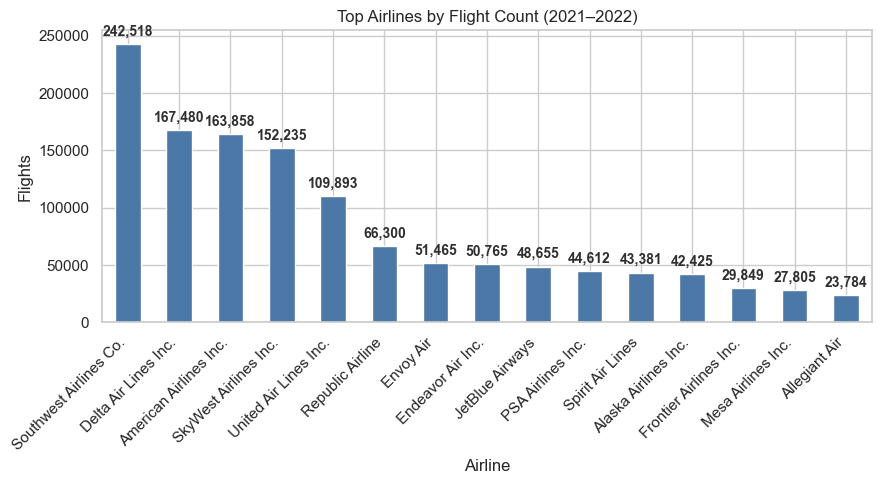

In [53]:
plt.figure(figsize=(9,5))
ax = (_df.groupby('AIRLINE').size().sort_values(ascending=False).head(15)
      .plot(kind='bar', color='#4C78A8'))
ax.set_title('Top Airlines by Flight Count (2021–2022)')
ax.set_xlabel('Airline')
ax.set_ylabel('Flights')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{int(h):,}',
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                xytext=(0,4), textcoords='offset points',
                color='#2f2f2f')
plt.tight_layout()
plt.show()

Busiest Months

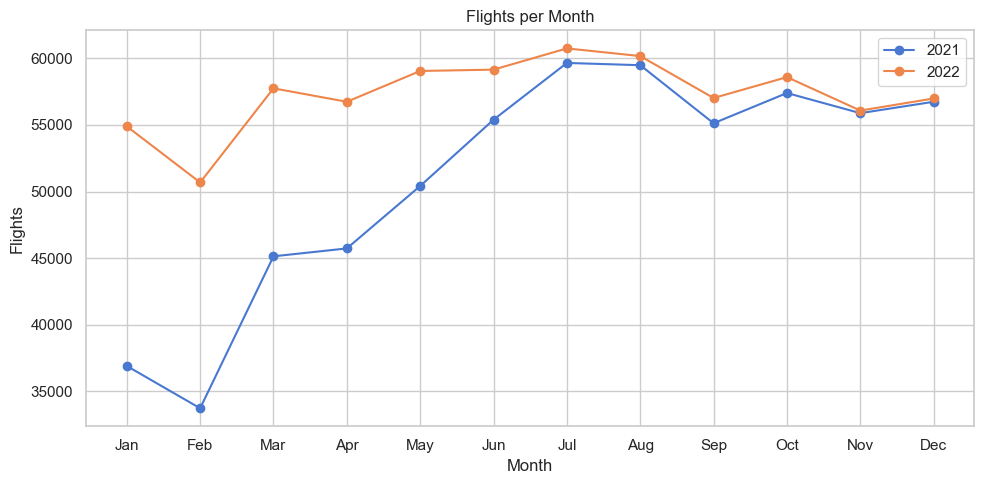

In [54]:
monthly = _df.groupby(['Year','Month']).size().reset_index(name='Flights')
monthly['MonthLabel'] = monthly['Month'].map(dict(zip(month_order, month_labels)))
plt.figure(figsize=(10,5))
for y, g in monthly.groupby('Year'):
    plt.plot(g['Month'], g['Flights'], marker='o', label=str(y))
plt.title('Flights per Month')
plt.xlabel('Month')
plt.ylabel('Flights')
plt.xticks(month_order, month_labels)
plt.legend()
plt.tight_layout()
plt.show()

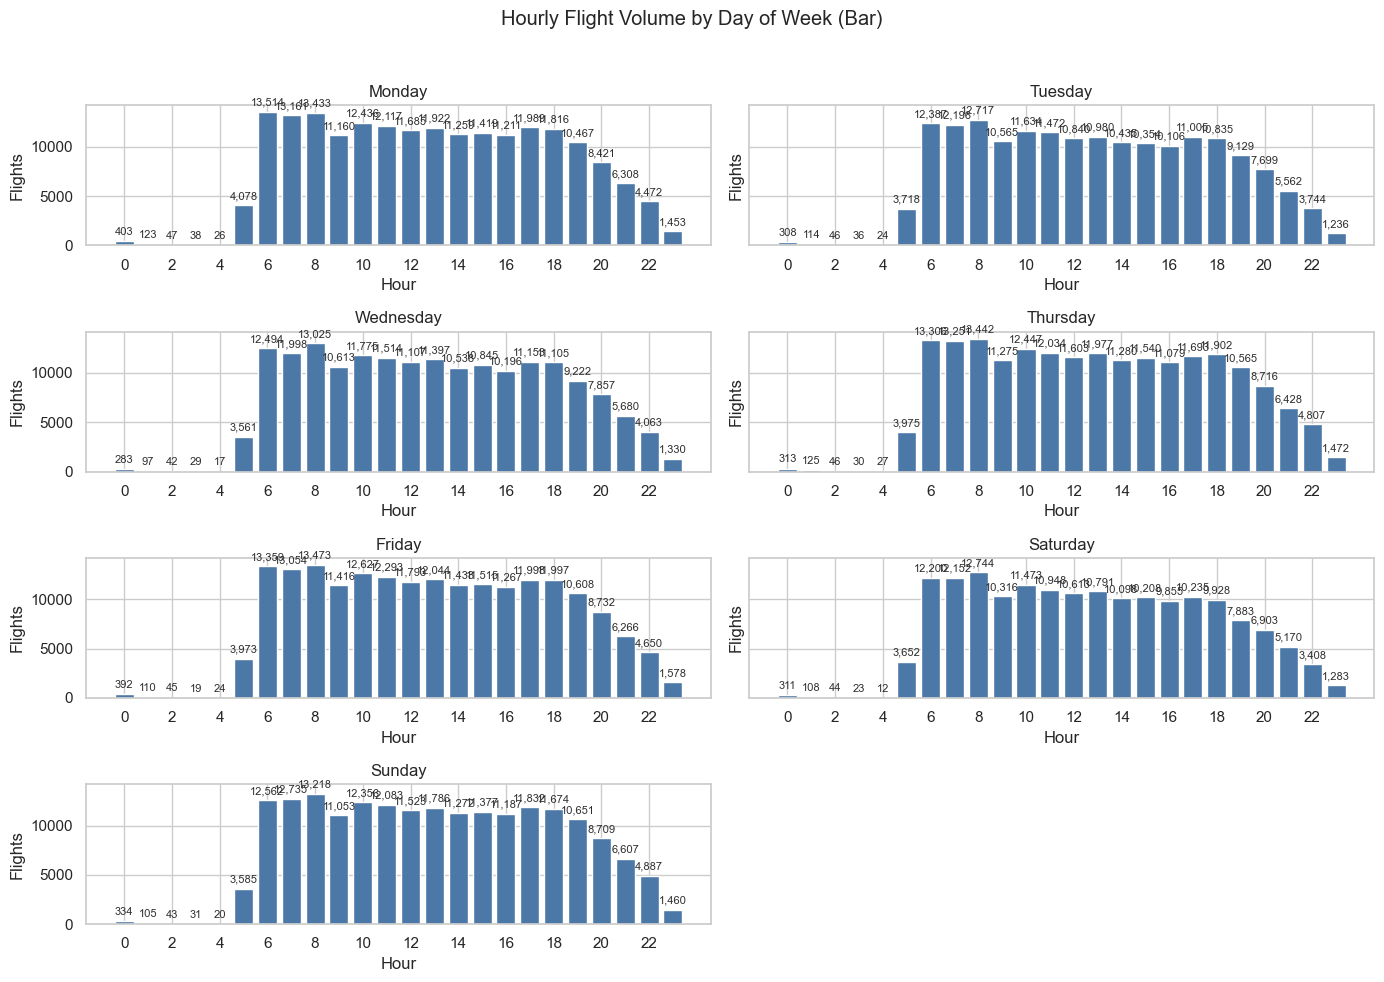

In [63]:
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

for i, dow in enumerate(dow_order):
    ax = axes[i]
    g = (_df[_df['DoW']==dow].groupby('Hour').size())
    ax.bar(g.index, g.values, color='#4C78A8', width=0.8)
    ax.set_title(dow)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Flights')
    ax.set_xticks(range(0,24,2))

# Hide the unused 8th subplot
for j in range(len(dow_order), len(axes)):
   fig.delaxes(axes[j])
# After drawing the bars, add labels on each subplot
for i, dow in enumerate(dow_order):
    ax = axes[i]
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{int(h):,}',
                        (p.get_x() + p.get_width()/2, h),
                        ha='center', va='bottom', fontsize=8,
                        xytext=(0,3), textcoords='offset points', color='#2f2f2f')

fig.suptitle('Hourly Flight Volume by Day of Week (Bar)')
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

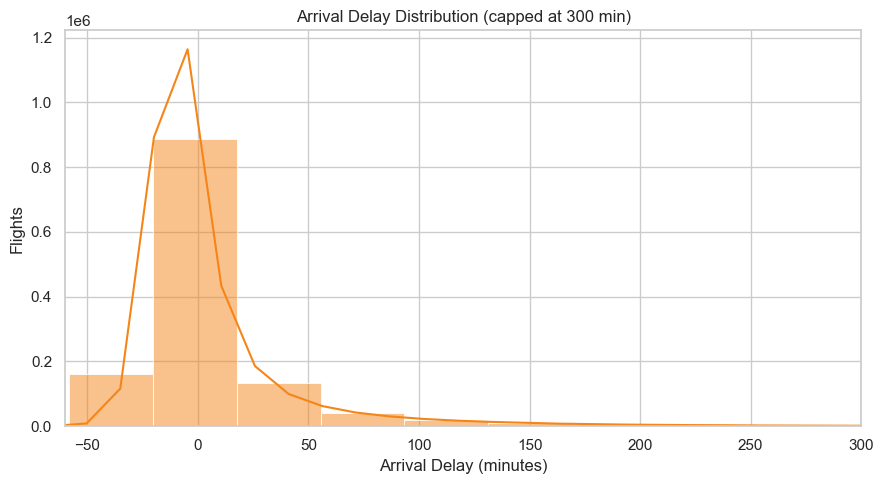

In [64]:
plt.figure(figsize=(9,5))
sns.histplot(_df['ARR_DELAY'].dropna(), bins=80, kde=True, color='#F58518')
plt.xlim(-60, 300)
plt.title('Arrival Delay Distribution (capped at 300 min)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Flights')
plt.tight_layout()
plt.show()


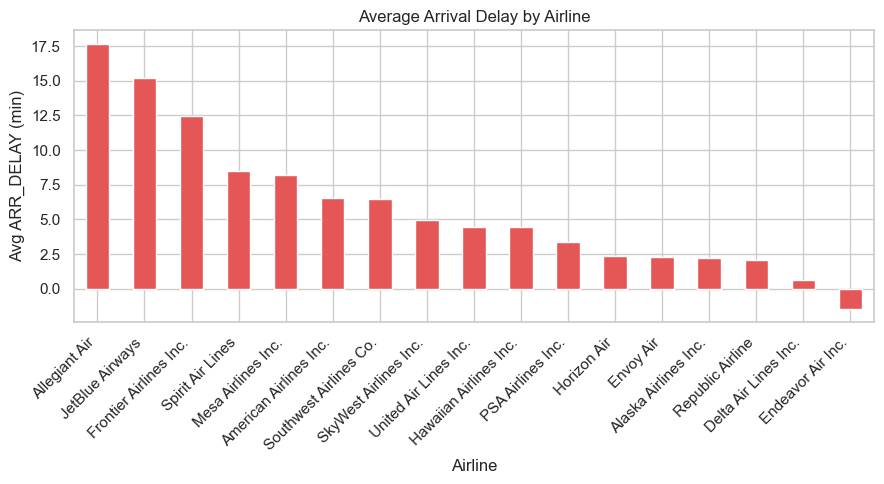

In [65]:
by_airline_delay = (_df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False))
plt.figure(figsize=(9,5))
by_airline_delay.plot(kind='bar', color='#E45756')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Avg ARR_DELAY (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [66]:
causes = ['DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT']
ca_df = (_df.groupby('AIRLINE')[causes].sum().replace({np.nan:0}))
ca_pct = ca_df.div(ca_df.sum(axis=1), axis=0).fillna(0)
ca_pct = ca_pct.loc[ca_df.sum(axis=1).sort_values(ascending=False).index]
ca_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Delay Minutes Composition by Airline')
plt.xlabel('Airline')
plt.ylabel('Share of Total Delay Minutes')
plt.legend(title='Cause', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


KeyError: "Columns not found: 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_SECURITY', 'DELAY_DUE_WEATHER', 'DELAY_DUE_CARRIER', 'DELAY_DUE_NAS'"